In [2]:
#load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
data.head()

<IPython.core.display.Javascript object>

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
data.fueltype.unique() #we can use this feature  to building the model

array(['gas', 'diesel'], dtype=object)

In [11]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

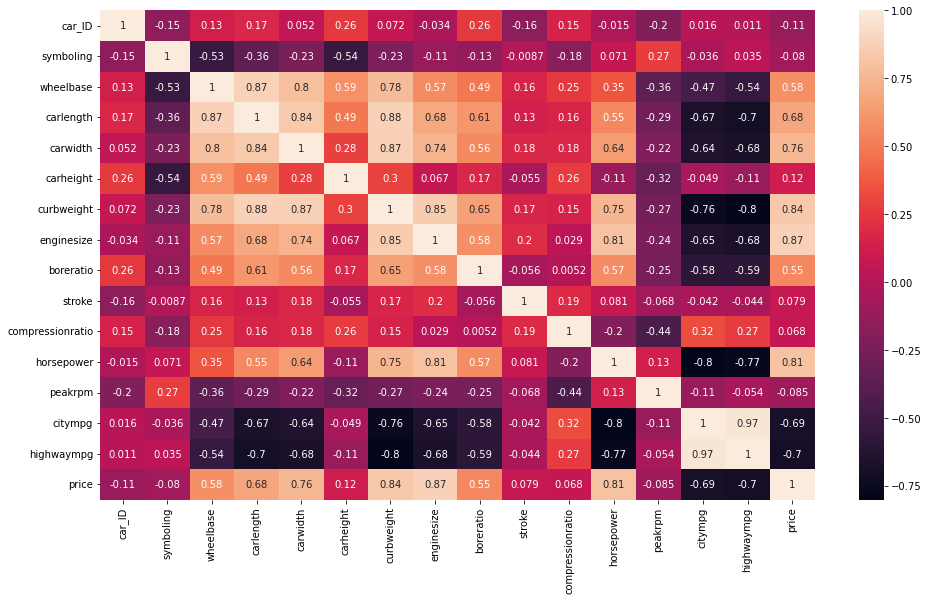

In [13]:
#now check the correlation 
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

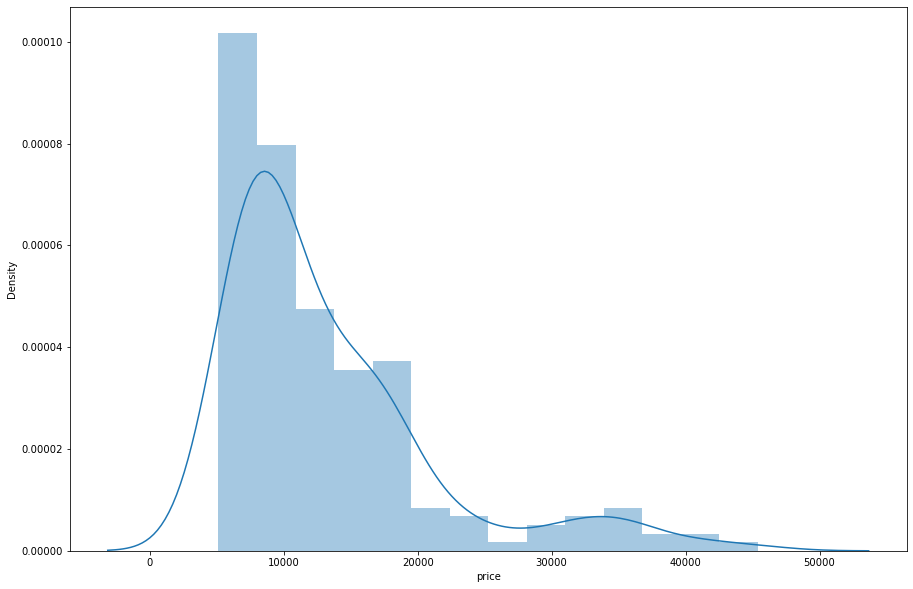

In [17]:
#now see the target varaible trend that is Price Feature
plt.figure(figsize=(15, 10))
sns.distplot(data.price)

#for that we are able to understand that the range between 8500 > to <20000 $ Price is most popular in this range

In [21]:
#now perform one hot encoding to convert fueltype to numeric type
data = pd.get_dummies(data, columns=['fueltype'],drop_first = True)

<IPython.core.display.Javascript object>

In [22]:
data

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1
202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1
203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0


In [23]:
data.rename(columns = {'fueltype_gas':'FuelType'}, inplace = True)

In [24]:
data

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,FuelType
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1
202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1
203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0


#now above based on the correlation chart now we are splitting the data into train & traning sample - here we go ----


In [29]:
data_X = data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg",'FuelType']]
data_Y = data[['price']]

In [30]:
data_X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,FuelType
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0


In [31]:
data_Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [32]:
#now split the data into tran & test split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
x=np.array(data_X)
y=np.array(data_Y)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=45)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature selection by ExtraTreesRegressor(model based). ExtraTreesRegressor helps us find the features which are most important.

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
extraReg = ExtraTreesRegressor()
extraReg.fit(xtrain,ytrain)

D:\Users\UDCSI-WS-016\AppData\Local\Temp\1\ipykernel_12856\1370703847.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraReg.fit(xtrain,ytrain)


ExtraTreesRegressor()

Let Show the Feature Importance

In [34]:
extraReg.feature_importances_ 

array([0.00577728, 0.02758705, 0.03333588, 0.05090954, 0.00686594,
       0.22423052, 0.27660765, 0.02007315, 0.00822031, 0.00746418,
       0.15800975, 0.01593526, 0.08419746, 0.07779615, 0.00298988])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

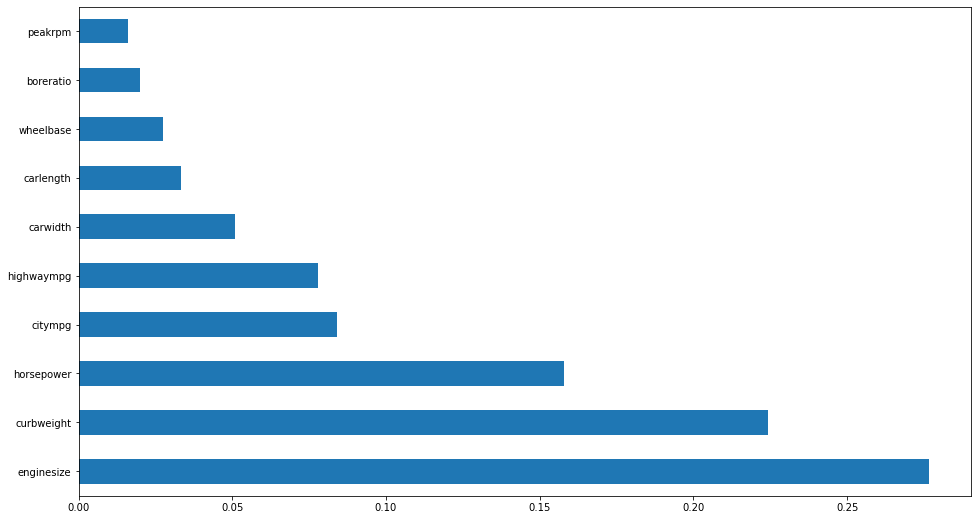

In [37]:
%matplotlib inline
plt.figure(figsize=(16,9))
featureImportance = pd.Series(extraReg.feature_importances_,index=data_X.columns)
featureImportance.nlargest(10).plot(kind='barh')

Based on plot above, we can select the features which will be most important for our prediction model.

#now train the model without hyperparameter tuning

In [38]:
ds_T_R_Normal = DecisionTreeRegressor()
ds_T_R_Normal.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [39]:
ds_T_R_Normal.score(xtest,ytest)

0.9152055853036927

On the testing data we got 91% accurecy

In [40]:
ds_T_R_Normal.score(xtrain,ytrain)

0.9993059663153238

On the train data we got 99% accurecy - That without hyper parameter tuning we got good accurecy but in this project I'll use Hyper Parameter Tuning - Here We Go

# Decision Tree Model Evaluation 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1152x648 with 0 Axes>

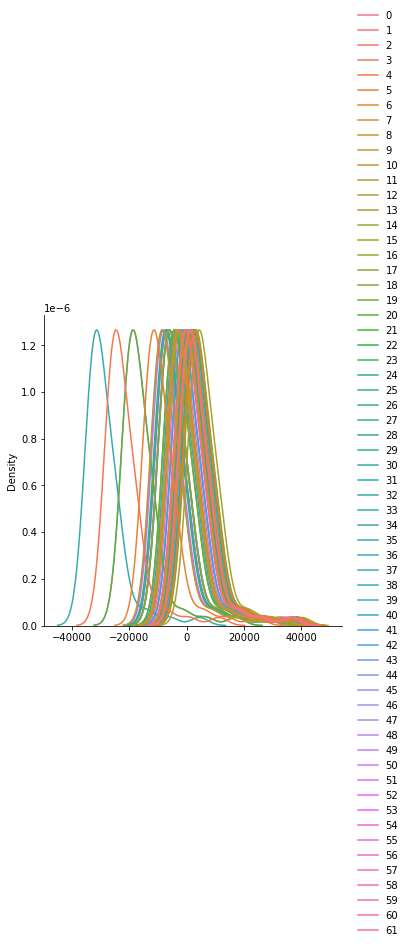

In [44]:
plt.figure(figsize = (16,9))
prediction=ds_T_R_Normal.predict(xtest)
sns.displot(ytest-prediction,kind='kde')  

<IPython.core.display.Javascript object>

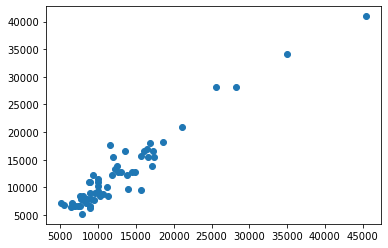

In [45]:
plt.scatter(ytest,prediction)

#Now Hyper Parameter Tuning

In [46]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,1,3,4,6,8,9,10,20,30,40,50,60,70,80,90] }

In [47]:
dt_REg = DecisionTreeRegressor()
tuning_model=GridSearchCV(dt_REg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3,n_jobs=-1,refit=True)

In [48]:
def timer(start_time=None):
    from datetime import datetime
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [49]:
start_time=timer(None)

tuning_model.fit(xtrain,ytrain)

timer(start_time)

Fitting 3 folds for each of 56448 candidates, totalling 169344 fits


D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
81144 fits failed out of a total of 169344.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18816 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 286, in fit
    check_scalar(
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\si

0.0 : 0.0 : 45.5


D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-28269292.51002894 -34294340.19425983 -30737024.60029222 ...
                nan                nan                nan]
  warnings.warn(


In [50]:
tuning_model.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [51]:
tuning_model.best_score_

-10154061.853528125

In [54]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=3,max_features='log2',max_leaf_nodes=50,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [55]:
tuned_hyper_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3, max_features='log2', max_leaf_nodes=50,
                      min_weight_fraction_leaf=0.1)

In [56]:
tuned_hyper_model.score(xtest,ytest)

0.6496817025451849

In [57]:
tuned_pred=tuned_hyper_model.predict(xtest)

<IPython.core.display.Javascript object>

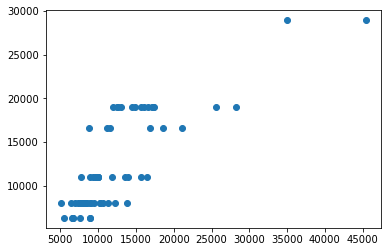

In [58]:
plt.scatter(ytest,tuned_pred)

In [59]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest,tuned_pred))
print('MSE:', metrics.mean_squared_error(ytest, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, tuned_pred)))

MAE: 2920.67402673033
MSE: 16507025.072022464


<IPython.core.display.Javascript object>

RMSE: 4062.8838368851334


In [60]:
# With out hyperparameter tuned 


print('MAE:', metrics.mean_absolute_error(ytest,prediction))
print('MSE:', metrics.mean_squared_error(ytest, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, prediction)))

MAE: 1451.725806451613
MSE: 3995519.330645161


<IPython.core.display.Javascript object>

RMSE: 1998.8795187917558
